# <span style="color: yellow; font-size: 2em; font-weight: bold;">K-Means Clustering</span>

K-Means clustering is an unsupervised learning algorithm that is used to group data points into K clusters. The algorithm works by iteratively assigning each data point to the cluster with the nearest centroid and then recalculating the centroids of the clusters. The process is repeated until the centroids no longer change significantly or a maximum number of iterations is reached.

The algorithm is simple and easy to implement, making it a popular choice for clustering tasks. However, it has some limitations, such as the need to specify the number of clusters K in advance and the sensitivity to the initial placement of the centroids.

We can find the number of clusters using the following most popular methods:

1. **The Elbow Method:-** The Elbow Method is a heuristic used to estimate the optimal number of clusters in a dataset. It works by plotting the within-cluster sum of squares (WCSS) for different values of K and looking for an "elbow" in the plot where the rate of decrease slows down.
2. **The Silhouette Method:-** The Silhouette Method is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

In [2]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

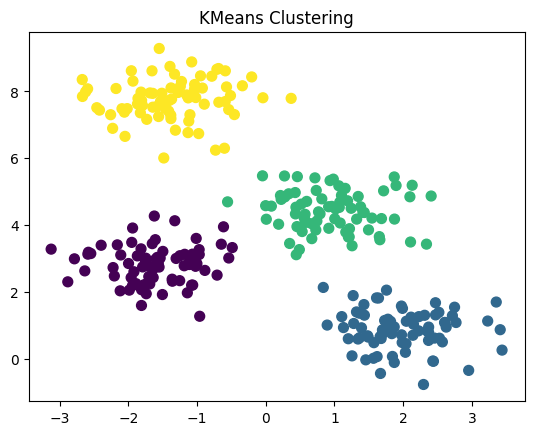

In [3]:
# generate the sample data 
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# initiate the KMeans model
kmeans = KMeans(n_clusters=4)

# fit the model to the data
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# plot the data points with different colors for each cluster label
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()

## Let's practice on diamond dataset

In [4]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Let's see the unique values of categorical columns as we will assign the number of clusters based on these values.

In [5]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [6]:
df['color'].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [7]:
df['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

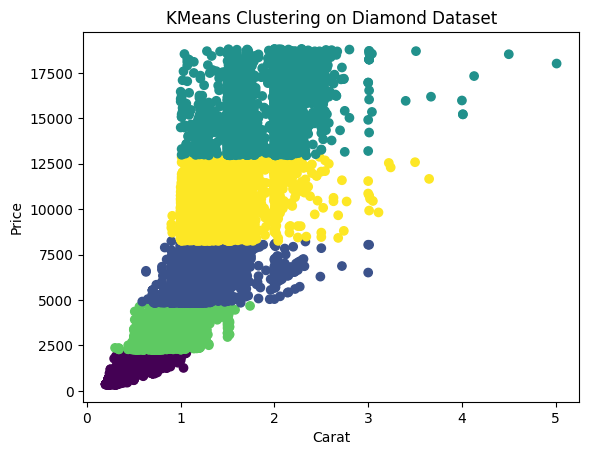

In [8]:
X = df[['carat', 'price']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# add predicted cluster labels to the dataframe
df['labels'] = labels

# plot the data points with different colors for each cluster label
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('KMeans Clustering on Diamond Dataset')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,labels
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [10]:
df.labels.unique()

array([0, 3, 1, 4, 2])

<Axes: xlabel='labels', ylabel='price'>

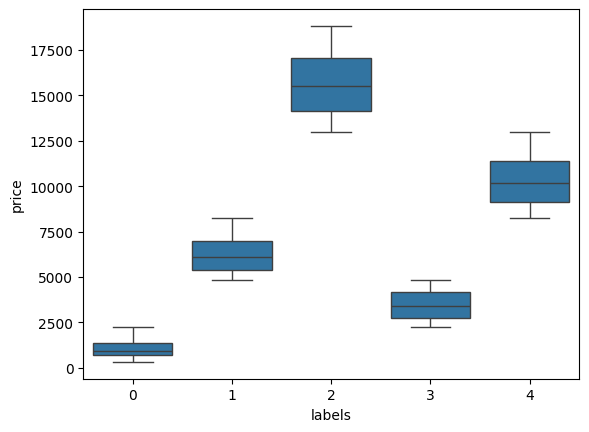

In [11]:
sns.boxplot(x='labels', y='price', data=df)

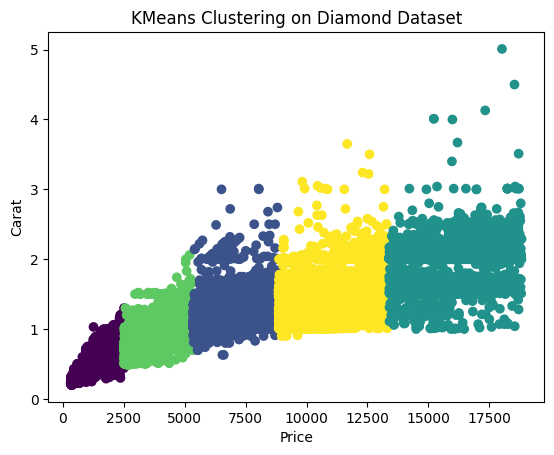

In [12]:
X = df[['price', 'carat']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# add predicted cluster labels to the dataframe
df['labels'] = labels

# plot the data points with different colors for each cluster label
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('KMeans Clustering on Diamond Dataset')
plt.xlabel('Price')
plt.ylabel('Carat')
plt.show()

## Let's change the number of clusters

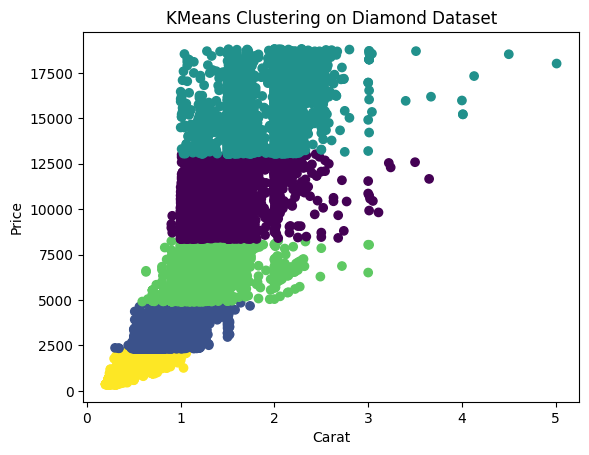

In [13]:
# select relevant columns
X = df[['carat', 'price', 'cut', 'color', 'clarity']]

# convert the categorical columns into numeric using one hot encoder
X = pd.get_dummies(X)

# initiate the KMeans model
kmeans = KMeans(n_clusters=5)

# fit the model to the data
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# add predicted cluster labels to the dataframe
df['labels'] = labels

# plot the data points with different colors for each cluster label
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('KMeans Clustering on Diamond Dataset')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

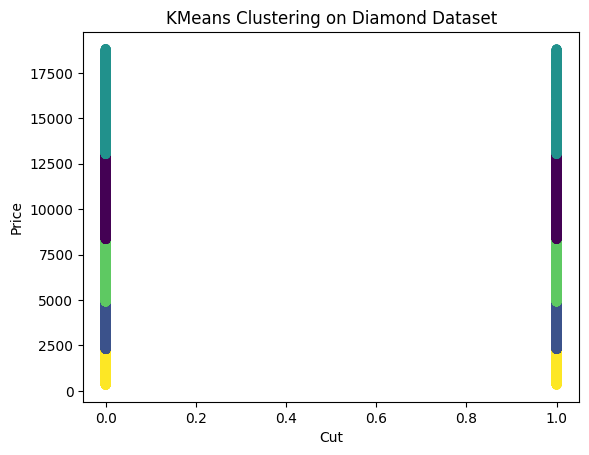

In [14]:
# plot the data points with different colors for each cluster label
plt.scatter(X.iloc[:, 2], X.iloc[:, 1], c=labels)
plt.title('KMeans Clustering on Diamond Dataset')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

### which kind of input variables can we take for clustering?
We can take all the input variables for clustering, but it is recommended to take only numerical variables for clustering. If we take categorical variables, we need to convert them into numerical variables using one hot encoding.

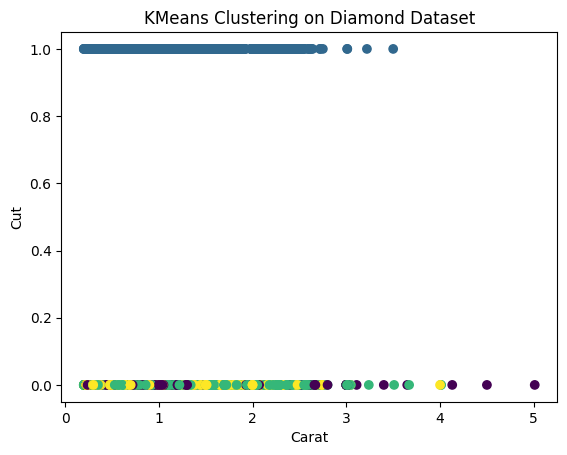

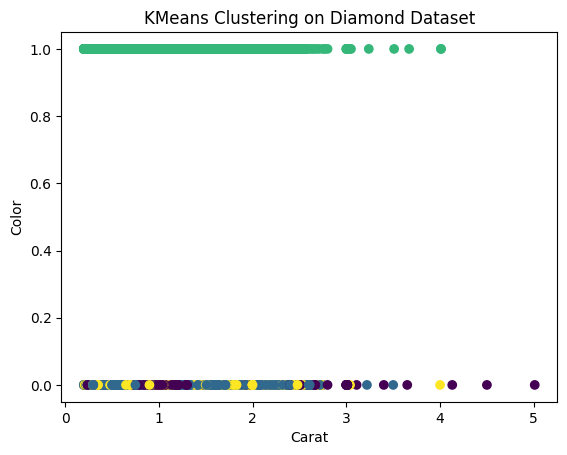

In [15]:
# select relevant columns
X = df[['carat', 'cut', 'color']]

# convert the categorical columns into numeric using one hot encoder
X = pd.get_dummies(X)

# initiate the KMeans model
kmeans = KMeans(n_clusters=4)

# fit the model to the data
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.labels_

# add predicted cluster labels to the dataframe
df['labels'] = labels

# plot the data points with different colors for each cluster label
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering on Diamond Dataset')
plt.xlabel('Carat')
plt.ylabel('Cut')
plt.show()

plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, cmap='viridis')
plt.title('KMeans Clustering on Diamond Dataset')
plt.xlabel('Carat')
plt.ylabel('Color')
plt.show()

## Adding cluster labels to the data for further EDA Work

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,labels
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [17]:
X = df[['carat', 'price']]

# initiate the KMeans model
kmeans = KMeans(n_clusters=5)

# fit the model to the data
kmeans.fit(X)

# get the predicted cluster labels for each data point
labels = kmeans.predict(X)

# add predicted cluster labels to the dataframe
df['labels'] = labels

# Display the first few rows of the dataframe
print(df.head())

# Display the unique values of a label
print('The unique values of labels are:', (sorted(df.labels.unique())))

   carat      cut color clarity  depth  table  price     x     y     z  labels
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43       1
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31       1
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31       1
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63       1
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75       1
The unique values of labels are: [0, 1, 2, 3, 4]


In [18]:
kmeans.inertia_

37594252456.86122

# Parallel Coordinate plot using plotly

In [19]:
# # parallel coordingate plot using plotly
# import plotly.express as px
# fig = px.parallel_coordinates(df, color='labels')
# fig.show()

## How to Find the best number of K in K-Means Clustering?
There are several methods to find the best number of K in K-Means Clustering. The most popular methods are:
1. The Elbow Method
2. The Silhouette Method

## **Elbow Method**

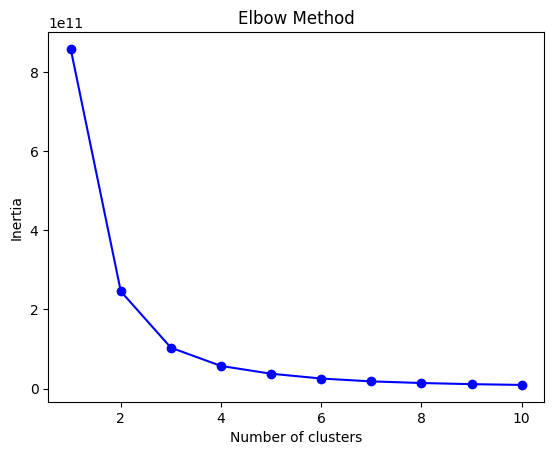

In [20]:
# Load the diamond dataset
df = sns.load_dataset('diamonds')

# select relevant columns
features = df[['carat', 'depth', 'price']]

# extract the selected features
X = features.values

# perform k means clustering for different values of k
kvalues = range(1,11) # test for k values from 1 to 11
inertia = [] # store the inertia values for each k value

for k in kvalues:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# plot the elbow
plt.plot(kvalues, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

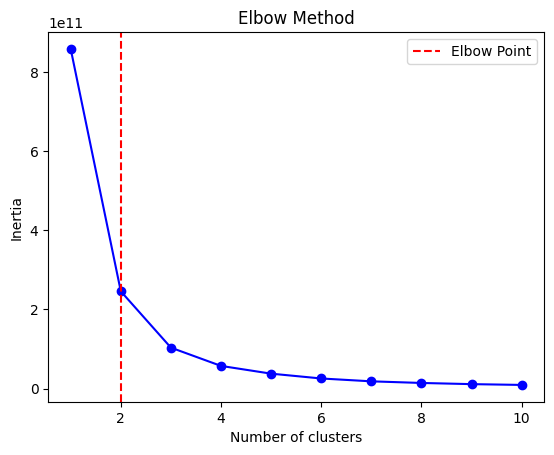

The best numer of clusters based on the elbow method is: 2


In [21]:
# Load the diamond dataset
df = sns.load_dataset('diamonds')

# select relevant columns
features = df[['carat', 'depth', 'price']]

# extract the selected features
X = features.values

# perform k means clustering for different values of k
kvalues = range(1,11) # test for k values from 1 to 11
inertia = [] # store the inertia values for each k value

for k in kvalues:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# plot the elbow
plt.plot(kvalues, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# find the elbow point
diff = [inertia[i] - inertia[i+1] for i in range(len(inertia)-1)]
best_k = diff.index(max(diff)) + 2

# add a vertical line at the elbow point
plt.axvline(x=best_k, color='red', linestyle='--', label = 'Elbow Point')
plt.legend()
plt.show()

print('The best numer of clusters based on the elbow method is:', best_k)

## **Silhoutte Method**

In [22]:
# from sklearn.metrics import silhouette_score

# # Load the diamond dataset
# df = sns.load_dataset('diamonds')

# # select relevant columns
# features = df[['carat', 'depth', 'price']]

# # extract the selected features
# X = features.values

# # perform k means clustering for different values of k
# kvalues = range(2, 11) # test for k values from 2 to 11
# silhouette_scores = [] # store the silhouette scores for each k value

# for k in kvalues:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     labels = kmeans.labels_
#     silhouette_scores.append(silhouette_score(X, labels))
    
# # plot the silhouette scores
# plt.plot(kvalues, silhouette_scores, 'bo-')
# plt.title('Silhouette Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

# **K-Means++**

K-Means++ is an extension of the K-Means algorithm that improves the quality of the initial centroids. It works by selecting the initial centroids in a way that is more likely to lead to a better final clustering. The algorithm is as follows:

1. Choose the first centroid randomly from the data points. 
2. For each data point, calculate the distance to the nearest centroid that has already been chosen.
3. Choose the next centroid from the data points with probability proportional to the square of the distance to the nearest centroid.

The K-Means++ algorithm is more robust to the choice of initial centroids and can lead to better clustering results than the standard K-Means algorithm. It is recommended to use K-Means++ when running K-Means clustering.

In [32]:
# import the dataset
df = sns.load_dataset('titanic')

# impute missing values of age and fare
df['age'].fillna(df['age'].mean(), inplace = True)
df['fare'].fillna(df['fare'].mean(), inplace = True)

C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_780\1748475731.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace = True)
C:\Users\Farhan Ali\AppData\Local\Temp\ipykernel_780\1748475731.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# choose the relevant columns
features = df[['age', 'fare']]

# extract the selected featuees from the dataset
X = features.values

# perform the K-Means clustering with K-Means++
k = 3
kmeans_pp = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
kmeans_pp.fit(X)


# perform the standard kmeans
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(X)

# add cluster labels to dataset
df['labels_pp'] = kmeans_pp.labels_
df['labels'] = kmeans.labels_

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,labels_pp,labels
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,0


In [38]:
df.labels_pp.value_counts()

labels_pp
0    729
2    142
1     20
Name: count, dtype: int64

In [39]:
df.labels.value_counts()

labels
0    729
2    142
1     20
Name: count, dtype: int64

In [ ]:
# from sklearn.metrics import silhouette_score

# # Load the diamond dataset
# df = sns.load_dataset('diamonds')

# # select relevant columns
# features = df[['carat', 'depth', 'price']]

# # extract the selected features
# X = features.values

# # perform k means clustering for different values of k
# kvalues = range(2, 11) # test for k values from 2 to 11
# silhouette_scores = [] # store the silhouette scores for each k value

# for k in kvalues:
#     kmeans = KMeans(n_clusters=k, init = 'k-means++')
#     kmeans.fit(X)
#     labels = kmeans.labels_
#     silhouette_scores.append(silhouette_score(X, labels))
    
# # plot the silhouette scores
# plt.plot(kvalues, silhouette_scores, 'bo-')
# plt.title('Silhouette Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.show()